In [15]:
import pandas as pd

In [16]:
df = pd.read_csv('datos/us-airlines-monthly-aircraft-miles-flown.csv',header=0,parse_dates=[0])

In [17]:
df.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [18]:
df.tail()

,Month,MilesMM
91,1970-08-01,14057
92,1970-09-01,16234
93,1970-10-01,12389
94,1970-11-01,11595
95,1970-12-01,12772


In [19]:
df.index = df['Month']

In [20]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#Arima model
# p - d - q
model1 = SARIMAX(df['MilesMM'], order=(5,1,3),seasonal_order=(1,1,1,12))
model1_fit1 = model1.fit()
#print(model1_fit1.summary())

C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed 

In [22]:
residuals = model1_fit1.resid

<AxesSubplot:xlabel='Month'>

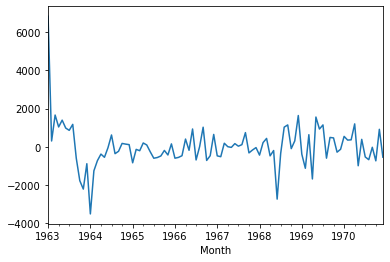

In [23]:
residuals.plot()

In [24]:
output = model1_fit1.forecast()

In [25]:
output

1971-01-01    11475.896069
Freq: MS, dtype: float64

In [36]:
model1_fit1.forecast(10)

1971-01-01    11475.896069
1971-02-01    11153.502300
1971-03-01    13669.509349
1971-04-01    12647.368334
1971-05-01    14338.994360
1971-06-01    15786.400730
1971-07-01    14979.200026
1971-08-01    15362.174645
1971-09-01    16962.867549
1971-10-01    13682.105221
1971-11-01    12426.901265
1971-12-01    13730.128736
1972-01-01    12470.572903
1972-02-01    12144.097495
1972-03-01    14869.090770
1972-04-01    13989.491545
1972-05-01    15097.883961
1972-06-01    16728.724991
1972-07-01    15945.757315
1972-08-01    16156.060877
1972-09-01    17903.111858
1972-10-01    14475.049764
1972-11-01    13356.555004
1972-12-01    14638.404195
1973-01-01    13352.387489
1973-02-01    13012.726705
1973-03-01    15694.746580
1973-04-01    14785.410699
1973-05-01    16045.513669
1973-06-01    17621.922107
1973-07-01    16831.349564
1973-08-01    17091.641460
1973-09-01    18803.324451
1973-10-01    15412.370622
1973-11-01    14252.821286
1973-12-01    15542.122541
1974-01-01    14265.852348
1

In [37]:
yhat = model1_fit1.predict()

In [43]:
df['MilesMM']

Month
1963-01-01     6827
1963-02-01     6178
1963-03-01     7084
1963-04-01     8162
1963-05-01     8462
              ...  
1970-08-01    14057
1970-09-01    16234
1970-10-01    12389
1970-11-01    11595
1970-12-01    12772
Name: MilesMM, Length: 96, dtype: int64

In [44]:
yhat

1963-01-01        0.000000
1963-02-01     5872.059263
1963-03-01     5422.255546
1963-04-01     7122.548182
1963-05-01     7067.360265
                  ...     
1970-08-01    14729.520179
1970-09-01    16257.252528
1970-10-01    13121.355175
1970-11-01    10678.872751
1970-12-01    13313.964344
Freq: MS, Name: predicted_mean, Length: 96, dtype: float64

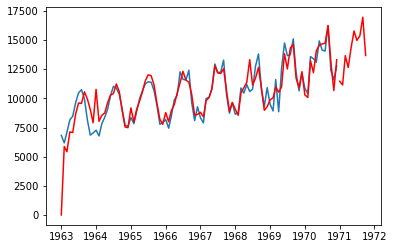

In [49]:
from matplotlib import pyplot
pyplot.plot(df['MilesMM'])
pyplot.plot(yhat,color='red')
pyplot.plot(model1_fit1.forecast(10),color='red')
#model1_fit1.forecast(50)

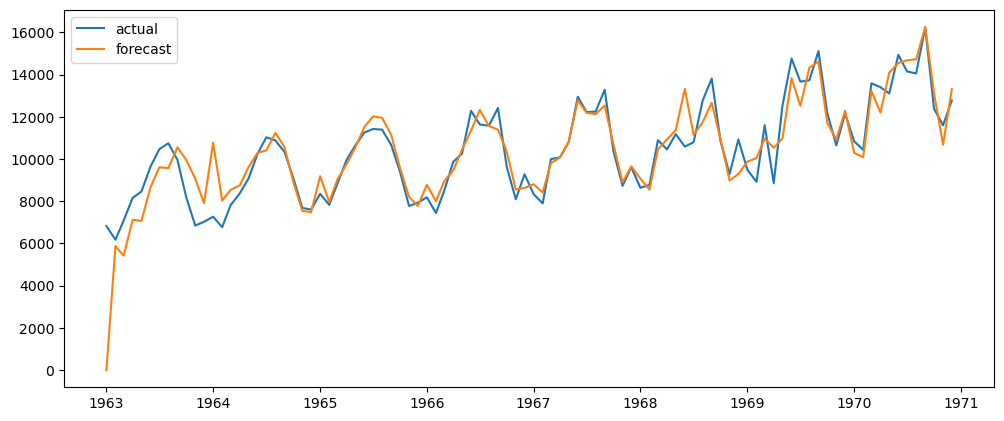

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5),dpi=100)
plt.plot(df['MilesMM'],label='actual')
#plt.plot(yhat,label='training')
plt.plot(yhat,label='forecast')
#plt.fill_between(lower_series.index,lower_series,upper_series,color='k', alpha=.15)
plt.legend()
plt.show()
